In [1]:
#import main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

In [2]:
#import main csv files
traindata = pd.read_csv('fraudTrain.csv')
testdata = pd.read_csv('fraudTest.csv')

In [3]:
traindata.head()
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


In [4]:
traindata.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0
1002102,1002102,2/15/2020 16:42,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0
1002103,1002103,2/15/2020 16:43,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN


In [5]:
# feature engineering

In [6]:
# converting Time to dateTime class object
traindata['Time'] = pd.to_datetime(traindata['Time'])
testdata['Time'] = pd.to_datetime(testdata['Time'])

In [7]:
print(testdata['Time'].head())
print(traindata['Time'].head())

0   2020-06-21 12:14:00
1   2020-06-21 12:14:00
2   2020-06-21 12:14:00
3   2020-06-21 12:15:00
4   2020-06-21 12:15:00
Name: Time, dtype: datetime64[ns]
0   2019-01-01 00:00:00
1   2019-01-01 00:00:00
2   2019-01-01 00:00:00
3   2019-01-01 00:01:00
4   2019-01-01 00:03:00
Name: Time, dtype: datetime64[ns]


In [8]:
print(traindata['Time'].describe())

count                          1002104
mean     2019-08-04 22:56:49.627184128
min                2019-01-01 00:00:00
25%                2019-05-05 11:43:00
50%                2019-08-05 16:02:30
75%                2019-11-17 17:16:00
max                2020-02-15 16:43:00
Name: Time, dtype: object


In [9]:
# adding mont and day and year to the dataset

traindata['Day'] = traindata['Time'].dt.day
traindata['Month'] = traindata['Time'].dt.month
traindata['Year'] = traindata['Time'].dt.year


testdata['Day'] = testdata['Time'].dt.day
testdata['Month'] = testdata['Time'].dt.month
testdata['Year'] = testdata['Time'].dt.year


In [10]:
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,21,6,2020
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,21,6,2020
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,21,6,2020
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,21,6,2020
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,21,6,2020


In [11]:
traindata.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020


In [12]:
# adding hour and minute to the dataset
traindata['Hour'] = traindata['Time'].dt.hour
traindata['Minute'] = traindata['Time'].dt.minute

testdata['Hour'] = testdata['Time'].dt.hour
testdata['Minute'] = testdata['Time'].dt.minute

In [13]:
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,21,6,2020,12,14
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,21,6,2020,12,14
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,21,6,2020,12,14
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,21,6,2020,12,15
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,21,6,2020,12,15


In [14]:
traindata.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020,16,40
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020,16,40
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020,16,42
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020,16,42
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020,16,43


In [15]:
#the number of unique value 
print(traindata['is_fraud'].nunique())
print(traindata['is_fraud'].unique())

print('------------------------------')
print(testdata['is_fraud'].nunique())
print(testdata['is_fraud'].unique())

2
[ 0.  1. nan]
------------------------------
2
[0 1]


In [16]:
# data cleansing

In [17]:
print(pd.value_counts(traindata['is_fraud']))
print(pd.value_counts(testdata['is_fraud']))


is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [18]:
traindata.shape

(1002104, 15)

In [19]:
testdata.shape


(555719, 15)

In [20]:
#count the number of nulls
print(traindata.isnull().sum())
print(testdata.isnull().sum())


ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64
ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [21]:
# dropping nan raws
traindata.dropna(inplace = True)

In [22]:
traindata['is_fraud'] = traindata['is_fraud'].astype(int)


In [23]:
traindata.shape

(1002103, 15)

In [24]:
print('number of unique values: ', traindata.nunique())

number of unique values:  ID             1002103
Time            452759
Card Number        320
merchant           693
category            14
Amount           47730
firstName          347
lastName           478
trans_num      1002103
is_fraud             2
Day                 31
Month               12
Year                 2
Hour                24
Minute              60
dtype: int64


In [25]:
testdata.shape

(555719, 15)

In [26]:
print('number of unique values: ', testdata.nunique())

number of unique values:  ID             555719
Time           226976
Card Number       904
merchant          693
category           14
Amount          37256
firstName         341
lastName          471
trans_num      555719
is_fraud            2
Day                31
Month               7
Year                1
Hour               24
Minute             60
dtype: int64


In [27]:
#count the number of nulls
print(traindata.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [28]:
#droping unique columns (do not affect the model)
# traindata.drop(columns = ['ID', 'firstName', 'lastName', 'trans_num'], axis = 1, inplace = True)
# testdata.drop(columns = ['ID', 'firstName', 'lastName', 'trans_num'], axis = 1, inplace = True)

In [29]:
# traindata.head()

In [30]:
# testdata.head()

In [31]:
#Histogram of columns

In [32]:
# sns.displot(x=traindata['Day'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
# plt.title("day number",size=20)
# plt.show()

In [33]:
# sns.displot(x=traindata['Amount'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
# plt.title("money amount",size=20)
# plt.show()

In [34]:
# sns.displot(x=traindata['merchant'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
# plt.title("merchant",size=20)
# plt.show()

In [35]:
# sns.relplot(x='merchant',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
# plt.show()

In [36]:
# sns.relplot(x='Day',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
# plt.show()

In [37]:
# sns.relplot(x='Hour',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
# plt.show()

In [38]:
#print all datatypes of objects
traindata.select_dtypes(include=['object']).columns

Index(['merchant', 'category', 'firstName', 'lastName', 'trans_num'], dtype='object')

In [39]:
#Encoding object columns in traindata

dummies = pd.get_dummies(traindata[['merchant','category']])
newdata = pd.concat([traindata, dummies], axis = 1)
x_train = newdata.drop(columns=['ID','Time','firstName','lastName','trans_num','is_fraud','merchant','category'])
y_train = newdata['is_fraud']


In [40]:
x_train.head()

,Card Number,Amount,Day,Month,Year,Hour,Minute,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.700000e+15,4.97,1,1,2019,0,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,6.300000e+11,107.23,1,1,2019,0,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3.890000e+13,220.11,1,1,2019,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.530000e+15,45.00,1,1,2019,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.760000e+14,41.96,1,1,2019,0,3,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int32

In [42]:
#Encoding object columns in testdata

dummies = pd.get_dummies(testdata[['merchant','category']])
newdata_test = pd.concat([testdata, dummies], axis = 1)
x_test = newdata_test.drop(columns=['ID','Time','firstName','lastName','trans_num','is_fraud','merchant','category'])
y_test = newdata_test['is_fraud']

In [43]:
x_test.head()

,Card Number,Amount,Day,Month,Year,Hour,Minute,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.291160e+15,2.86,21,6,2020,12,14,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3.573030e+15,29.84,21,6,2020,12,14,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3.598220e+15,41.28,21,6,2020,12,14,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3.591920e+15,60.05,21,6,2020,12,15,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.526830e+15,3.19,21,6,2020,12,15,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [40]:
testdata.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2.291160e+15,319,10,2.86,151,115,98699,0,21,6,2020,12,14
1,1,3.573030e+15,591,10,29.84,163,457,108785,0,21,6,2020,12,14
2,2,3.598220e+15,611,5,41.28,24,249,433979,0,21,6,2020,12,14
3,3,3.591920e+15,222,9,60.05,42,457,71993,0,21,6,2020,12,15
4,4,3.526830e+15,292,13,3.19,247,261,190585,0,21,6,2020,12,15


In [45]:
# check if any data is duplicated
testdata.duplicated().sum()

0

In [ ]:
# fig = plt.subplots(figsize=(20, 10))
# sns.heatmap(traindata.corr(),annot = True)

<Axes: >

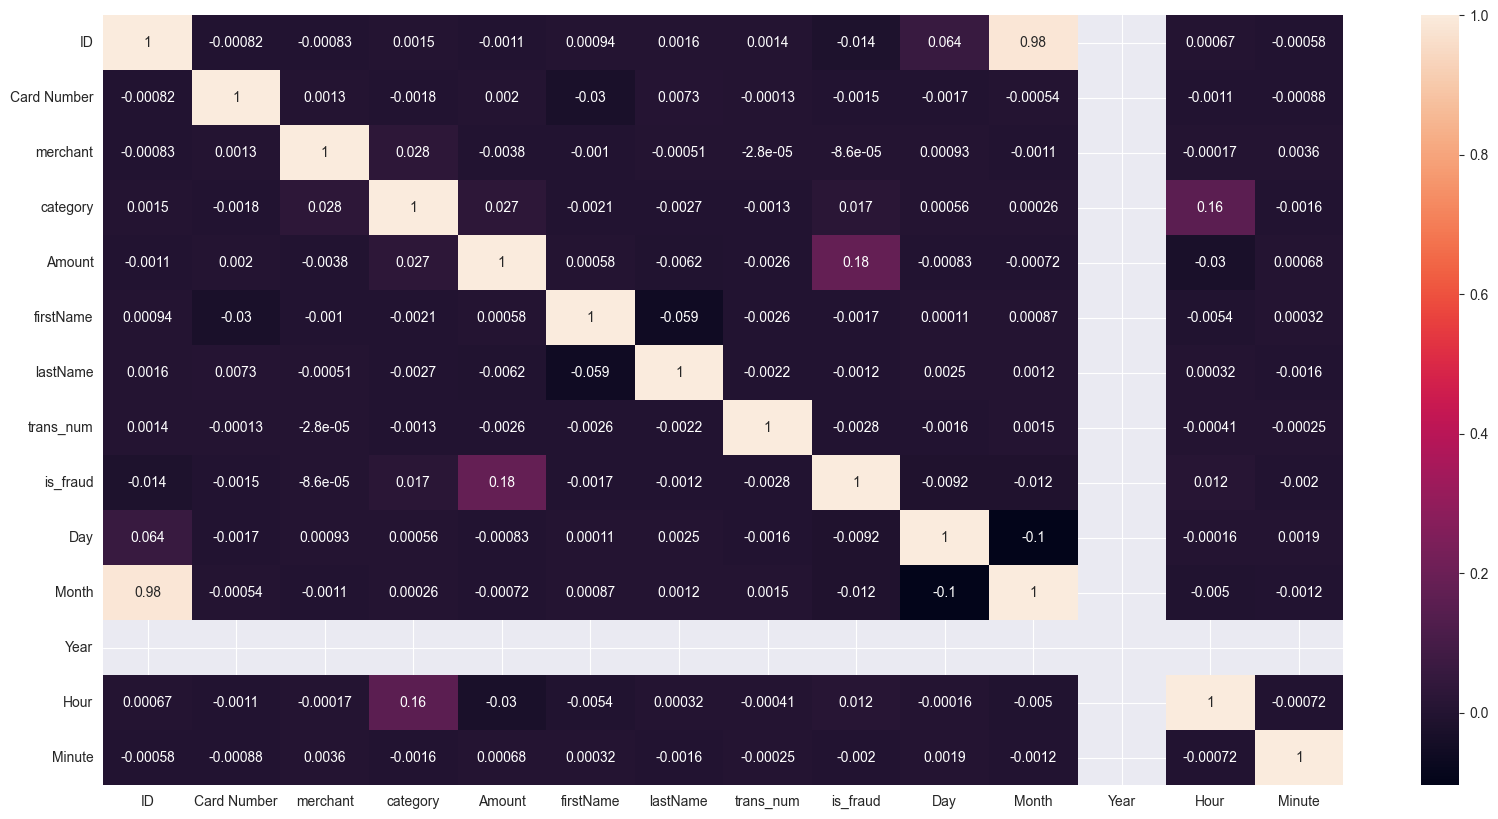

In [45]:
# fig = plt.subplots(figsize=(20, 10))
# sns.heatmap(testdata.corr(),annot = True)

In [ ]:
# traindata.corr()

In [47]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [52]:
print(len(x_train),len(y_train))

1002103 1002103


In [53]:
print(y_train.value_counts())

is_fraud
0    996390
1      5713
Name: count, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
x_train, y_train = rus.fit_resample(x_train,y_train)


In [55]:
print(y_train.value_counts())

is_fraud
0    5713
1    5713
Name: count, dtype: int64


In [ ]:
x_test = x_test.astype(float)

In [74]:
x_train = x_train.astype(float)

In [75]:
x_test.head()

,Card Number,Amount,Day,Month,Year,Hour,Minute,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.291160e+15,2.86,21.0,6.0,2020.0,12.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.573030e+15,29.84,21.0,6.0,2020.0,12.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.598220e+15,41.28,21.0,6.0,2020.0,12.0,14.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.591920e+15,60.05,21.0,6.0,2020.0,12.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.526830e+15,3.19,21.0,6.0,2020.0,12.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
x_train.head()

,Card Number,Amount,Day,Month,Year,Hour,Minute,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
914071,5.130000e+15,74.85,29.0,12.0,2019.0,18.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266313,2.130000e+14,4.23,12.0,5.0,2019.0,11.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
266284,1.800000e+14,108.92,12.0,5.0,2019.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666895,3.600000e+15,40.77,11.0,10.0,2019.0,17.0,43.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512421,5.150000e+15,38.51,10.0,8.0,2019.0,11.0,52.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
x_train.shape

(11426, 714)

In [79]:
x_test.shape

(555719, 714)

In [77]:
#model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


MemoryError: Unable to allocate 2.96 GiB for an array with shape (714, 555719) and data type float64

In [66]:
#accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.metrics import recall_score

trainScore = accuracy_score(y_train,y_train_pred)

print('precision: %.2f' % precision_score(y_train, y_train_pred))
print('recall: %.2f' % recall_score(y_train, y_train_pred))
print('f1_score: %.2f' % f1_score(y_train, y_train_pred))
print(f'the train accuracy is {trainScore*100}%')
print(f'the train score is {trainScore}')
print('train Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('---------------------------------------')





ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [64]:

testScore = accuracy_score(y_test,y_test_pred)

print('precision: %.2f' % precision_score(y_test, y_test_pred))
print('recall: %.2f' % recall_score(y_test, y_test_pred))
print('f1_score: %.2f' % f1_score(y_test, y_test_pred))
print(f'the test accuracy is {testScore*100}%')
print(f'the test score is {testScore}')
print('train Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
print('---------------------------------------')

precision: 0.12
recall: 0.94
f1_score: 0.22
the test accuracy is 97.36449536546348%
the test score is 0.9736449536546348
train Confusion Matrix:
 [[539054  14520]
 [   126   2019]]
---------------------------------------


In [60]:
# from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
# 
# rus = RandomUnderSampler(sampling_strategy = 1)
# x_train_new, y_train_new = rus.fit_resample(x_train,y_train)
# 
# x1
# #xtr xt ytr yt
# x1, x2, y1, y2 = train_test_split(x_train_new,y_train_new, test_size = 0.2)
# 
# #model training
# from sklearn.ensemble import RandomForestClassifier
# 
# model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# model.fit(x1,y1)
# y_pred_tr = model.predict(x1)
# y_pred_t = model.predict(x2)
